# 02 Introduction to Sympy Module
---

## Introduction 🤔

### What is Sympy?
[![Sympy](https://img.shields.io/badge/Sympy-3B5526?style=flat&logo=Sympy&logoColor=white)](https://www.sympy.org/en/index.html) is an open-source Python library for symbolic computation. 

It provides computer algebra capabilities either as a standalone application, as a library to other applications, or live on the web as SymPy Live or SymPy Gamma.SymPy is simple to install and to inspect because it is written entirely in Python with few dependencies. This ease of access combined with a simple and extensible code base in a well known language make SymPy a computer algebra system with a relatively low barrier to entry.

SymPy includes features ranging from basic symbolic arithmetic to calculus, algebra, discrete mathematics, and quantum physics. It is capable of formatting the result of the computations as LaTeX code.


In [1]:
import numpy as np #Importing numpy for arrays
import sympy as smp #Importing sympy for symbolic expressions
import matplotlib.pyplot as plt #Importing matplotlib for plotting

## Introduction

### Symbols can be defined as follows:

In [2]:
x = smp.symbols('x') #Defining a symbol x

You can then use various mathematical operators on the defined symbols

In [3]:
x**2 #Giving power to the symbol x

x**2

There are many many functions built into sympy

In [4]:
smp.sin(x) #Calling sin from sympy module

sin(x)

In [5]:
smp.cos(x) #Calling cos from sympy module

cos(x)

Can save expressions in new variables
Rememeber to use tab key to explore all the options in sympy

In [6]:
#smp. Hit "TAB" for all options

### Arithmetic operations

In [7]:
y = x**2 + 2*x + 1 #Defining an expression
y #CAlling an expression

x**2 + 2*x + 1

Note that it doesn't expand. There are different methods you need to call to do different things with the expression:

In [8]:
z = y**2 #Definning a new variable for the expression
z #Calling a new variable

(x**2 + 2*x + 1)**2

In [9]:
z.factor() #Calling factor fxn to do the factorization

(x + 1)**4

In the notation `smp.solve(f,x)`, sympy finds the value of $x$ that makes $f(x)=0$. 

In [10]:
smp.solve(z,x) #Calling solve fxn to find at what value my fxn becomes zero

[-1]

In [11]:
smp.solve(smp.sin(x),x) #Calling solve fxn to find at what value my fxn becomes zero

[0, pi]

**Good Practice**: 

If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [12]:
x = smp.symbols('x') #Defining a variable x
smp.solve(x**2+1,x) #Calling solve fxn to do the find out at what valve function becomes zero

[-I, I]

So here you see it has came out as -I and I, imaginary numbers

In [13]:
x = smp.symbols('x',real=True,positive=True) #defining x symbol and saying its real and positive
smp.solve(x+4,x) #Calling solve function

[]

Here its an empty set indication no posible answer

### Defining many variables at time

In [14]:
x,y,z = smp.symbols('x y z') #Defining x y and z
F = x+y+z #Defining a fxn
F #Calling a fxn

x + y + z

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case, $F=0$ is being solved for

In [15]:
x_sols = smp.solve(F,x) #Calling solve to get the values at x = 0
x_sols

[-y - z]

In [16]:
y_sols = smp.solve(F,y) #Calling solve to get the values at y = 0
y_sols

[-x - z]

In [17]:
z_sols = smp.solve(F,z) #Calling solve to get the values at z = 0
z_sols

[-x - y]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [18]:
expr = x_sols[0] #Solve analytically
expr

-y - z

In [19]:
expr_f = smp.lambdify([z,y],expr) #This module provides convenient functions to transform SymPy expressions to lambda functions which can be used to calculate numerical values very fast.
expr_f(2,2)

-4

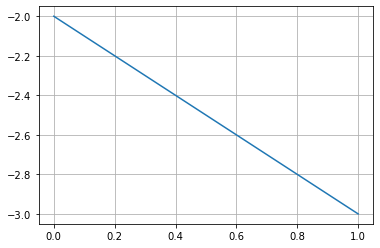

In [20]:
x_num = np.linspace(0,1,100) #Defining an array
y_num = 2 #Defining a constant
plt.plot(x_num, expr_f(x_num,y_num)) #Ploting x and y
plt.grid() #Calling grid
plt.show() #Calling plot

For multivariable expressions, can also substitute values in

In [21]:
F #Calling function

x + y + z

In [22]:
F.subs([(y,5),(z,3)]) #Substituting y = 5 and z = 3 

x + 8

## Calculus

In [23]:
x = smp.symbols('x') #Defining x symbol

### Limits

$$\lim_{x \to \pi} \tan(x/2+ \tan(x))$$

In [24]:
smp.limit(smp.tan(x/2+smp.tan(x)),x,smp.pi) #Calling limit fxn and defining the fxn for a range of x to pi

-oo

### Derivatives

$$ \frac{d}{dx} \left( \frac{1+\cos x}{1 - \sin x} \right)^2 $$

In [25]:
smp.diff(((1+smp.cos(x))/(1-smp.sin(x)))**2,x) #Calling diff fxn for analytical differentiation 

-2*(cos(x) + 1)*sin(x)/(1 - sin(x))**2 + 2*(cos(x) + 1)**2*cos(x)/(1 - sin(x))**3

$$\frac{d}{dx} f(x+g(x)) $$

### Basic Integration

$$ \int \sin(x) \cos (x)  dx $$

In [26]:
smp.integrate(smp.sin(x)*smp.cos(x),x) #Callng integrate fxn for indefinite range

sin(x)**2/2

### Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [27]:
smp.integrate(smp.exp(x)/smp.sqrt(smp.exp(2*x)+9),(x,0,smp.log(4))) #calling integrate to integrate a fxn for a definte range 

-asinh(1/3) + asinh(4/3)

$$\int_1^t x^{3} e^x dx $$

In [28]:
t= smp.symbols('t') #Defining a new variable t
smp.integrate(x**3*smp.exp(x), (x, 1, t)) #Calling integrate 

(t**3 - 3*t**2 + 6*t - 6)*exp(t) + 2*E

## Multivariable Calculus

In [29]:
x,y,z,p,q,r,a,b,c = smp.symbols('x y z p q r a b c')

### Vectors and Geometry

In [30]:
U = smp.Matrix([p,q,r])
V = smp.Matrix([a,b,c])

### Addition and multiplication

In [31]:
2*U + V

Matrix([
[a + 2*p],
[b + 2*q],
[c + 2*r]])

### Dot product

In [32]:
U.dot(V)

a*p + b*q + c*r

### Cross product

In [33]:
U.cross(V)

Matrix([
[-b*r + c*q],
[ a*r - c*p],
[-a*q + b*p]])

### Norm

In [34]:
U.norm()

sqrt(Abs(p)**2 + Abs(q)**2 + Abs(r)**2)

## Vector Calculus

### Vector Derivatives

In [35]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [36]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

### Vector Integrals

(Note: Will not add the +C)

In [37]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [38]:
smp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])